In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")



In [2]:
df=pd.read_csv("/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv")
df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [4]:
def check_and_drop_duplicate(df):
    if df.duplicated().sum() != 0:
        print(f'There are {df.duplicated().sum()} duplicated rows.')
        df = df.drop_duplicates().copy()
        print('Rows dropped successfully.')
    else:
        print('There are no duplicate rows.')
    return df

df = check_and_drop_duplicate(df)

There are no duplicate rows.


In [5]:
df.drop(["Observation ID","Family","Common Name","Genus","Observer Name","Conservation Status","Notes"], axis=1, inplace=True)
df.head()

,Scientific Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type
0,Crocodylus moreletii,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps
1,Crocodylus acutus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves
2,Crocodylus intermedius,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas
3,Crocodylus moreletii,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers
4,Crocodylus palustris,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific Name       1000 non-null   object 
 1   Observed Length (m)   1000 non-null   float64
 2   Observed Weight (kg)  1000 non-null   float64
 3   Age Class             1000 non-null   object 
 4   Sex                   1000 non-null   object 
 5   Date of Observation   1000 non-null   object 
 6   Country/Region        1000 non-null   object 
 7   Habitat Type          1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [7]:
df["Date of Observation"] = pd.to_datetime(df["Date of Observation"], format="%d-%m-%Y")
df["Year"] = df["Date of Observation"].dt.year
df["Month"] = df["Date of Observation"].dt.month
df["Day"] = df["Date of Observation"].dt.day
df["Season"] = df["Month"]%12 // 3 + 1
df["Season"] = df["Season"].map({1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"})
df.drop("Date of Observation", axis=1, inplace=True)
df.drop(["Year","Month","Day"], axis=1, inplace=True)
df.head()

,Scientific Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type,Season
0,Crocodylus moreletii,1.90,62.0,Adult,Male,Belize,Swamps,Spring
1,Crocodylus acutus,4.09,334.5,Adult,Male,Venezuela,Mangroves,Winter
2,Crocodylus intermedius,1.08,118.2,Juvenile,Unknown,Venezuela,Flooded Savannas,Winter
3,Crocodylus moreletii,2.42,90.4,Adult,Male,Mexico,Rivers,Fall
4,Crocodylus palustris,3.75,269.4,Adult,Unknown,India,Rivers,Summer


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific Name       1000 non-null   object 
 1   Observed Length (m)   1000 non-null   float64
 2   Observed Weight (kg)  1000 non-null   float64
 3   Age Class             1000 non-null   object 
 4   Sex                   1000 non-null   object 
 5   Country/Region        1000 non-null   object 
 6   Habitat Type          1000 non-null   object 
 7   Season                1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [9]:
cat_cols=df.select_dtypes(include=["object"]).columns
num_cols=df.select_dtypes(include=["int64","int32","float64"]).columns

In [10]:
X=df.drop("Scientific Name", axis=1)
y=df["Scientific Name"]

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = list(num_cols)
cat_features = [c for c in cat_cols if c != "Scientific Name"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False), cat_features)
    ]
)


In [12]:
def remove_outliers(X, y):
    numeric_cols = X.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
    y = y[X.index]
    return X, y
X, y = remove_outliers(X, y)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

models={
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(verbosity=-1),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
detailed_results = []

for model_name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    if np.issubdtype(y_pred.dtype, np.integer):
        y_pred_labels = le.inverse_transform(y_pred)
        y_test_labels = le.inverse_transform(y_test)
    else:
        y_pred_labels = y_pred
        y_test_labels = y_test

    acc = accuracy_score(y_test_labels, y_pred_labels)
    report = classification_report(y_test_labels, y_pred_labels, output_dict=True, zero_division=0)

    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']

    results[model_name] = acc
    detailed_results.append([model_name, acc, precision, recall, f1])

    print("="*60)
    print(f"Model: {model_name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test_labels, y_pred_labels))

results_df = pd.DataFrame(detailed_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1']).sort_values(by='Accuracy', ascending=False)

print("\n\nFinal Results:")
print(results_df)


Model: Random Forest - Accuracy: 0.9432
                         precision    recall  f1-score   support

      Crocodylus acutus       1.00      0.88      0.93         8
       Crocodylus halli       0.85      0.92      0.88        12
 Crocodylus intermedius       1.00      1.00      1.00         7
   Crocodylus johnstoni       0.92      1.00      0.96        12
 Crocodylus mindorensis       1.00      1.00      1.00         9
   Crocodylus moreletii       0.93      1.00      0.96        13
   Crocodylus niloticus       0.00      0.00      0.00         2
Crocodylus novaeguineae       0.90      0.82      0.86        11
   Crocodylus palustris       0.78      0.70      0.74        10
     Crocodylus raninus       1.00      1.00      1.00        16
   Crocodylus rhombifer       1.00      1.00      1.00        10
   Crocodylus siamensis       1.00      0.92      0.96        12
      Crocodylus suchus       0.82      1.00      0.90         9
 Mecistops cataphractus       0.90      1.00     

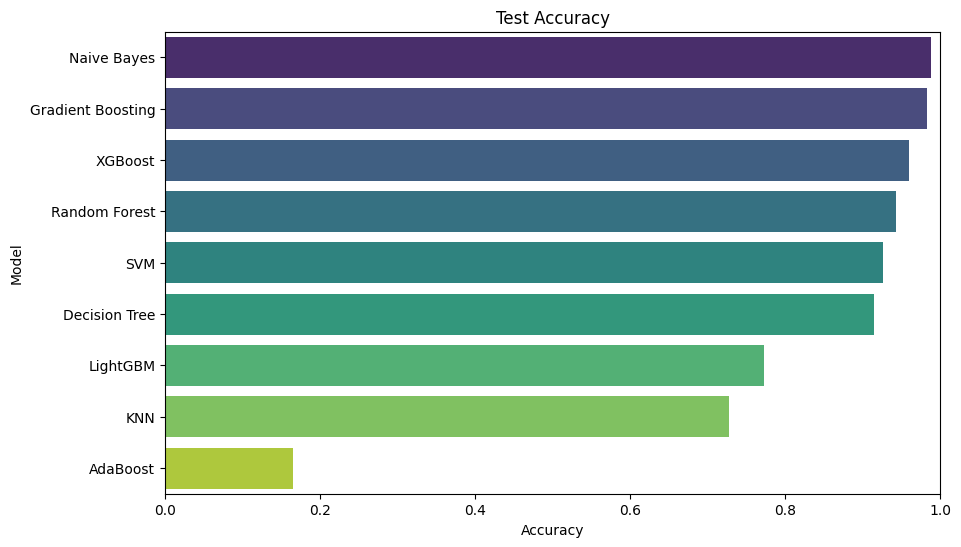

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Test Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0,1)
plt.show()


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for model_name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_validate(clf, X, y_encoded, cv=cv, scoring=scoring)
    
    cv_results[model_name] = {
        "Mean Accuracy": scores['test_accuracy'].mean(),
        "Accuracy Std": scores['test_accuracy'].std(),
        "Mean Precision": scores['test_precision_macro'].mean(),
        "Mean Recall": scores['test_recall_macro'].mean(),
        "Mean F1": scores['test_f1_macro'].mean()
    }
    
    print("="*60)
    print(f"Model : {model_name}")
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f} (Std: {scores['test_accuracy'].std():.4f})")
    print(f"Precision: {scores['test_precision_macro'].mean():.4f}")
    print(f"Recall: {scores['test_recall_macro'].mean():.4f}")
    print(f"F1: {scores['test_f1_macro'].mean():.4f}")

cv_results_df = pd.DataFrame(cv_results).T.sort_values(by="Mean Accuracy", ascending=False)
print("\n\nCross-Validation Results:")
print(cv_results_df)


Model : Random Forest
Accuracy: 0.9432 (Std: 0.0230)
Precision: 0.9179
Recall: 0.9031
F1: 0.9035
Model : Gradient Boosting
Accuracy: 0.9705 (Std: 0.0075)
Precision: 0.9417
Recall: 0.9370
F1: 0.9374
Model : AdaBoost
Accuracy: 0.1864 (Std: 0.0226)
Precision: 0.0879
Recall: 0.1614
F1: 0.0996
Model : Decision Tree
Accuracy: 0.9057 (Std: 0.0202)
Precision: 0.8925
Recall: 0.8868
F1: 0.8860
Model : XGBoost
Accuracy: 0.9682 (Std: 0.0105)
Precision: 0.9446
Recall: 0.9429
F1: 0.9413
Model : LightGBM
Accuracy: 0.7773 (Std: 0.0231)
Precision: 0.7540
Recall: 0.7396
F1: 0.7372
Model : SVM
Accuracy: 0.9568 (Std: 0.0214)
Precision: 0.9349
Recall: 0.9238
F1: 0.9238
Model : KNN
Accuracy: 0.7602 (Std: 0.0358)
Precision: 0.7713
Recall: 0.7264
F1: 0.7206
Model : Naive Bayes
Accuracy: 0.9739 (Std: 0.0117)
Precision: 0.9519
Recall: 0.9451
F1: 0.9448


Cross-Validation Results:
                   Mean Accuracy  Accuracy Std  Mean Precision  Mean Recall  \
Naive Bayes             0.973864      0.011700        



Cross-Validation Results:
                   Mean Accuracy  Accuracy Std  Mean Precision  Mean Recall  \
Naive Bayes             0.973864      0.011700        0.951947     0.945081   
Gradient Boosting       0.970455      0.007538        0.941689     0.937003   
XGBoost                 0.968182      0.010538        0.944562     0.942851   
SVM                     0.956818      0.021441        0.934879     0.923786   
Random Forest           0.943182      0.023010        0.917873     0.903059   
Decision Tree           0.905682      0.020200        0.892540     0.886810   
LightGBM                0.777273      0.023122        0.753997     0.739600   
KNN                     0.760227      0.035827        0.771291     0.726446   
AdaBoost                0.186364      0.022556        0.087929     0.161438   

                    Mean F1  
Naive Bayes        0.944798  
Gradient Boosting  0.937449  
XGBoost            0.941256  
SVM                0.923822  
Random Forest      0.903492  
D

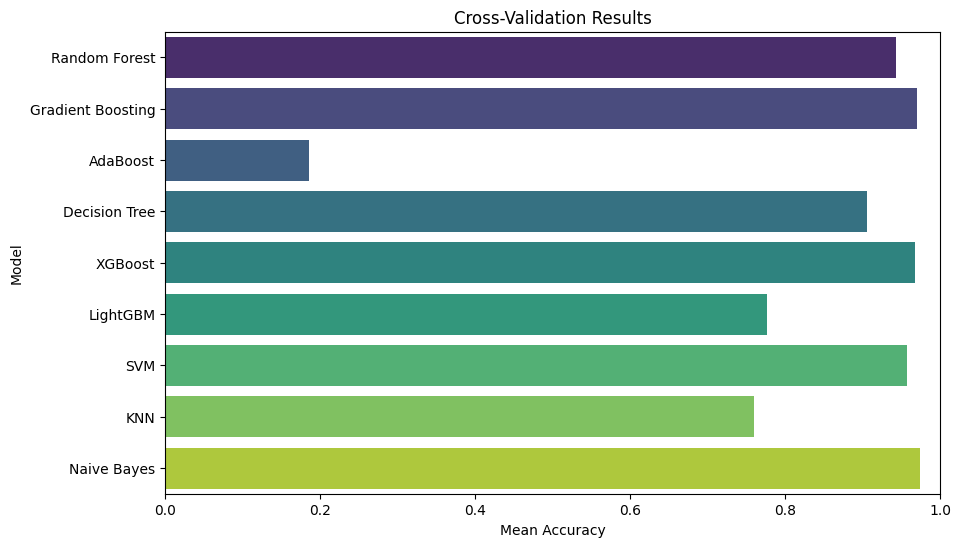

In [18]:
cv_results_df = pd.DataFrame(cv_results).T.sort_values(by="Mean Accuracy", ascending=False)
print("\n\nCross-Validation Results:")
print(cv_results_df)

cv_means = [cv_results[m]["Mean Accuracy"] for m in cv_results]
cv_stds = [cv_results[m]["Accuracy Std"] for m in cv_results]

cv_plot_df = pd.DataFrame({
    "Model": list(cv_results.keys()),
    "Mean Accuracy": cv_means,
    "Std Dev": cv_stds
})

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Mean Accuracy",
    y="Model",
    data=cv_plot_df,
    palette="viridis",
    errorbar="sd"
)
plt.title("Cross-Validation Results")
plt.xlabel("Mean Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

In [19]:
best_model_name = cv_results_df.index[0]
print(f"\nBest Model Name: {best_model_name}")
best_model = models[best_model_name]

final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])
final_model.fit(X, y_encoded)


Best Model Name: Naive Bayes


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Observed Length (m)',
                                                   'Observed Weight (kg)']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Age Class', 'Sex',
                                                   'Country/Region',
                                                   'Habitat Type',
                                                   'Season'])])),
                ('classifier', GaussianNB())])

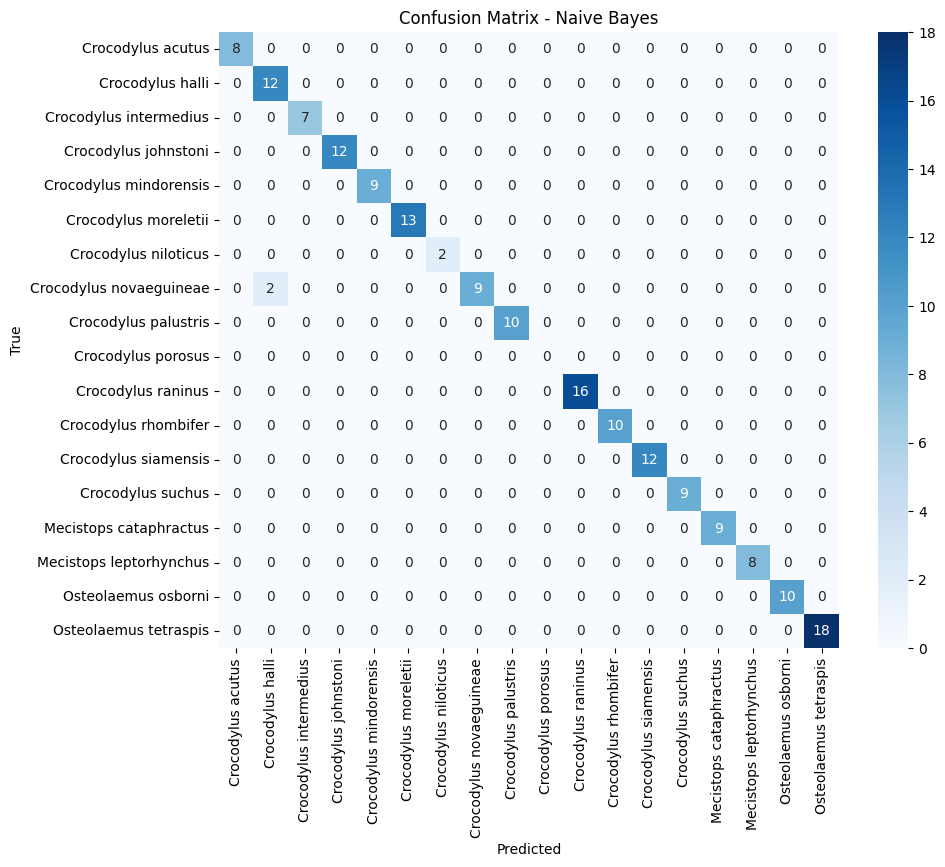

In [20]:
from sklearn.metrics import confusion_matrix


y_test_pred = final_model.predict(X_test)

y_test_labels = le.inverse_transform(y_test)
y_test_pred_labels = le.inverse_transform(y_test_pred)

cm = confusion_matrix(y_test_labels, y_test_pred_labels, labels=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


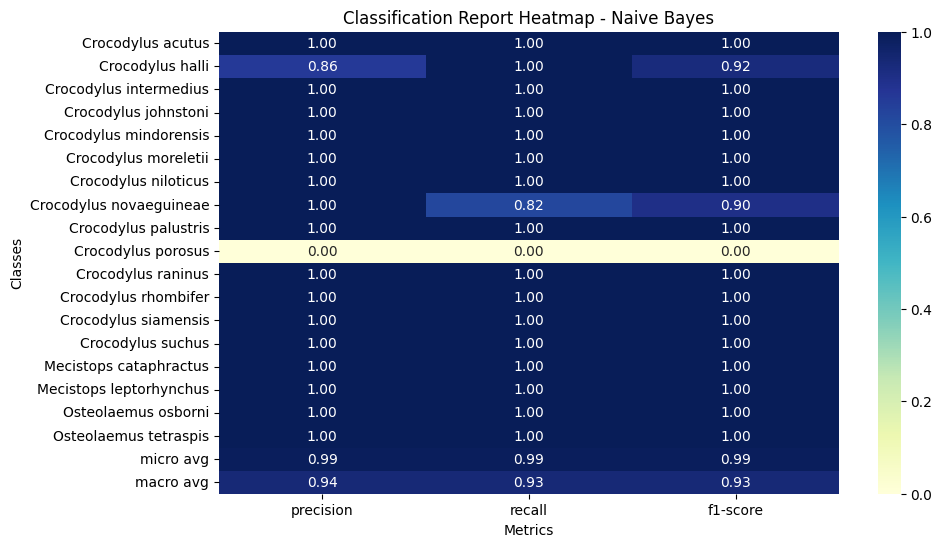

In [21]:
from sklearn.metrics import classification_report

report = classification_report(
	y_test_labels,
	y_test_pred_labels,
	labels=le.classes_,
	target_names=le.classes_,
	output_dict=True
)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title(f"Classification Report Heatmap - {best_model_name}")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()


In [22]:
def new_data(input_dict, X_columns):
    new_data = pd.DataFrame([input_dict])
    for col in X_columns:
        if col not in new_data.columns:
            new_data[col] = np.nan
    new_data = new_data[X_columns]
    return new_data

user_input = {
    "Sex": "Male",
    "Habitat Type": "River",
    "Age Class": "Adult",
    "Country/Region": "Australia",
    "Observed Length (m)": 4,
    "Observed Weight (kg)": 500,
    "Season": "Spring"
}

new_data = new_data(user_input, X.columns)
y_new_pred = final_model.predict(new_data)
predicted_label = le.inverse_transform(y_new_pred)
print("Estimated Scientific Name:", predicted_label[0])


Estimated Scientific Name: Crocodylus intermedius
